# Activity 2: Analyzing Different Scenarios and Generating the Appropriate Visualization

We'll be working with the 120 years of Olympic History dataset acquired by Randi Griffin from https://www.sports-reference.com/ and made available on the GitHub repository of this book. Your assignment is to identify the top five sports based on the largest number of medals awarded in the year 2016, and then perform the following analysis:

1.  Generate a plot indicating the number of medals awarded in each of the top five sports in 2016.
2.  Plot a graph depicting the distribution of the age of medal winners in the top five sports in 2016.
3.  Find out which national teams won the largest number of medals in the top five sports in 2016.
4.  Observe the trend in the average weight of male and female athletes winning in the top five sports in 2016.

## High-Level Steps

1.  Download the dataset and format it as a pandas DataFrame.
2.  Filter the DataFrame to only include the rows corresponding to medal winners from 2016.
3.  Find out the medals awarded in 2016 for each sport.
4.  List the top five sports based on the largest number of medals awarded. Filter the DataFrame one more time to only include the records for the top five sports in 2016.
5.  Generate a bar plot of record counts corresponding to each of the top five sports.
6.  Generate a histogram for the Age feature of all medal winners in the top five sports (2016).
7.  Generate a bar plot indicating how many medals were won by each country's team in the top five sports in 2016.
8.  Generate a bar plot indicating the average weight of players, categorized based on gender, winning in the top five sports in 2016.

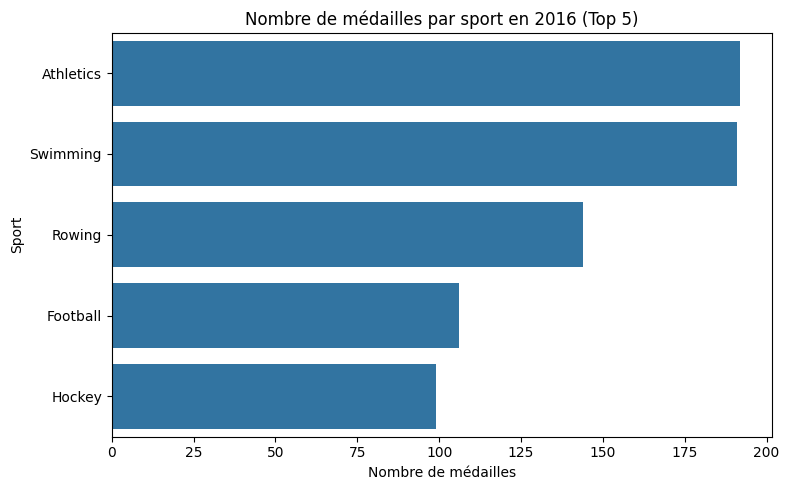

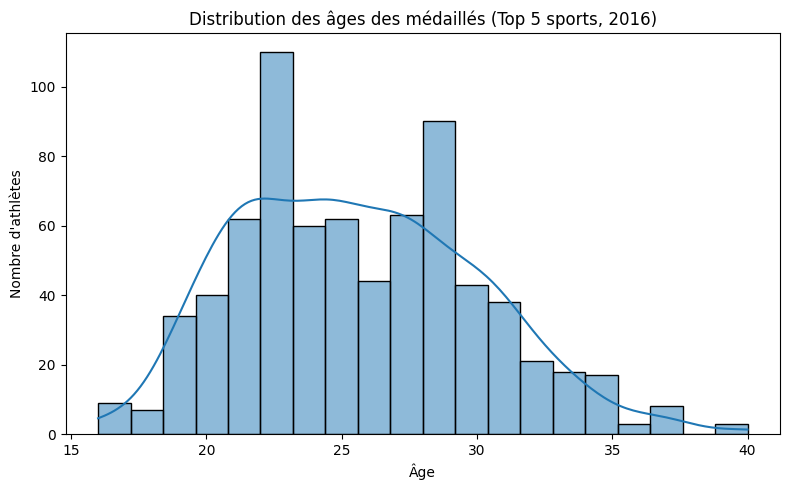

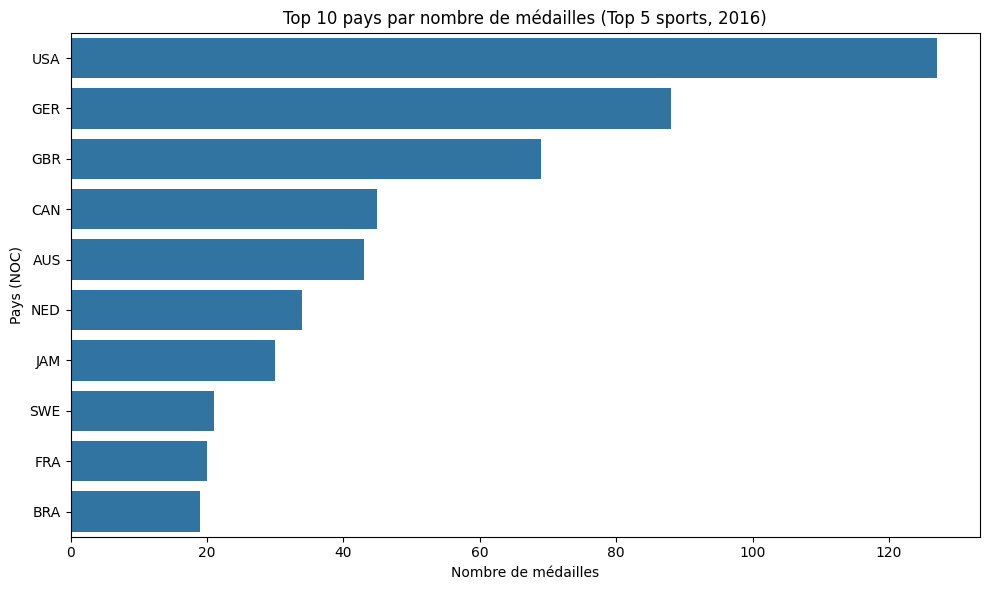

C:\Users\leoso\AppData\Local\Temp\ipykernel_28812\3201240468.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_top5, x='Sport', y='Weight', hue='Sex', ci=None)


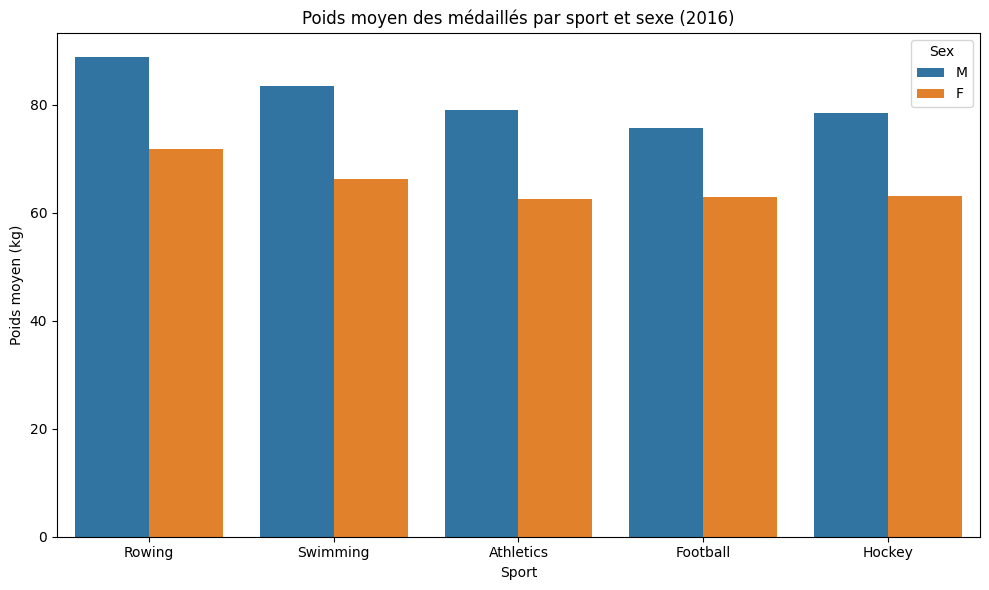

In [11]:
# Préparation du code Python pour réaliser l'analyse demandée dans le lab
# 1. Chargement et traitement du dataset olympique (Athlete Events)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le fichier fourni
df = pd.read_csv("datasets/athlete_events.csv")

# Étape 2 : Filtrer les médaillés de 2016 uniquement
df_2016 = df[(df['Year'] == 2016) & (df['Medal'].notna())]

# Étape 3 : Compter les médailles par sport
top5_sports = df_2016['Sport'].value_counts().head(5).index.tolist()

# Filtrer les données pour ne garder que les top 5 sports
df_top5 = df_2016[df_2016['Sport'].isin(top5_sports)]

# Étape 4.1 : Bar plot du nombre de médailles par sport (top 5)
plt.figure(figsize=(8,5))
sns.countplot(data=df_top5, y='Sport', order=top5_sports)
plt.title("Nombre de médailles par sport en 2016 (Top 5)")
plt.xlabel("Nombre de médailles")
plt.ylabel("Sport")
plt.tight_layout()
plt.show()

# Étape 4.2 : Histogramme de l'âge des médaillés dans les top 5 sports
plt.figure(figsize=(8,5))
sns.histplot(data=df_top5, x='Age', bins=20, kde=True)
plt.title("Distribution des âges des médaillés (Top 5 sports, 2016)")
plt.xlabel("Âge")
plt.ylabel("Nombre d'athlètes")
plt.tight_layout()
plt.show()

# Étape 4.3 : Médailles par pays (NOC) dans les top 5 sports
plt.figure(figsize=(10,6))
top_teams = df_top5['NOC'].value_counts().head(10)
sns.barplot(x=top_teams.values, y=top_teams.index)
plt.title("Top 10 pays par nombre de médailles (Top 5 sports, 2016)")
plt.xlabel("Nombre de médailles")
plt.ylabel("Pays (NOC)")
plt.tight_layout()
plt.show()

# Étape 4.4 : Poids moyen des athlètes par sport et sexe
plt.figure(figsize=(10,6))
sns.barplot(data=df_top5, x='Sport', y='Weight', hue='Sex', ci=None)
plt.title("Poids moyen des médaillés par sport et sexe (2016)")
plt.xlabel("Sport")
plt.ylabel("Poids moyen (kg)")
plt.tight_layout()
plt.show()